In [1]:
%pip install seaborn
%pip install folium
%pip install geopandas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
accidents_df = pd.read_csv("Road Accident Data.csv")

# Display the first few rows of the dataset
print(accidents_df.head())

# Check for missing values
print(accidents_df.isnull().sum())

# Check for duplicates
print(accidents_df.duplicated().sum())

# Summary statistics
print(accidents_df.describe())

  Accident_Index Accident Date Day_of_Week          Junction_Control  \
0  200901BS70001      1/1/2021    Thursday  Give way or uncontrolled   
1  200901BS70002      1/5/2021      Monday  Give way or uncontrolled   
2  200901BS70003      1/4/2021      Sunday  Give way or uncontrolled   
3  200901BS70004      1/5/2021      Monday       Auto traffic signal   
4  200901BS70005      1/6/2021     Tuesday       Auto traffic signal   

           Junction_Detail Accident_Severity   Latitude  \
0  T or staggered junction           Serious  51.512273   
1               Crossroads           Serious  51.514399   
2  T or staggered junction            Slight  51.486668   
3  T or staggered junction           Serious  51.507804   
4               Crossroads           Serious  51.482076   

        Light_Conditions Local_Authority_(District) Carriageway_Hazards  ...  \
0               Daylight     Kensington and Chelsea                None  ...   
1               Daylight     Kensington and Chelsea 

<ipython-input-4-f7637eca49ff>:9: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  ax = sns.countplot(data=accidents_df, x='Road_Surface_Conditions', palette=custom_palette, edgecolor='black',


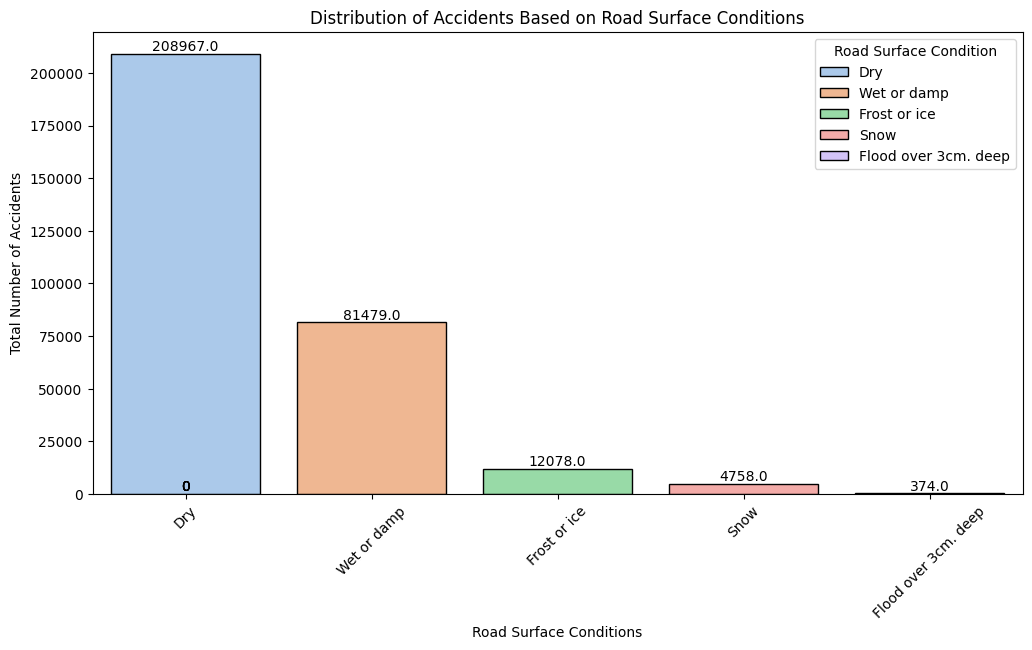

In [4]:
# Get unique road surface conditions
unique_conditions = accidents_df['Road_Surface_Conditions'].unique()

# Generate a custom pastel color palette with enough colors for each road surface condition
custom_palette = sns.color_palette("pastel", n_colors=len(unique_conditions))

# Distribution of accidents based on road surface conditions
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=accidents_df, x='Road_Surface_Conditions', palette=custom_palette, edgecolor='black', 
                   order=accidents_df['Road_Surface_Conditions'].value_counts().index, hue='Road_Surface_Conditions')
plt.title('Distribution of Accidents Based on Road Surface Conditions')
plt.xlabel('Road Surface Conditions')
plt.ylabel('Total Number of Accidents')
plt.xticks(rotation=45)

# Add total number of accidents for each road surface condition on the x-axis
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.legend(title='Road Surface Condition')
plt.show()

<ipython-input-5-020097ed344e>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=accidents_df, x='Time_Category', palette='pastel', edgecolor='black')


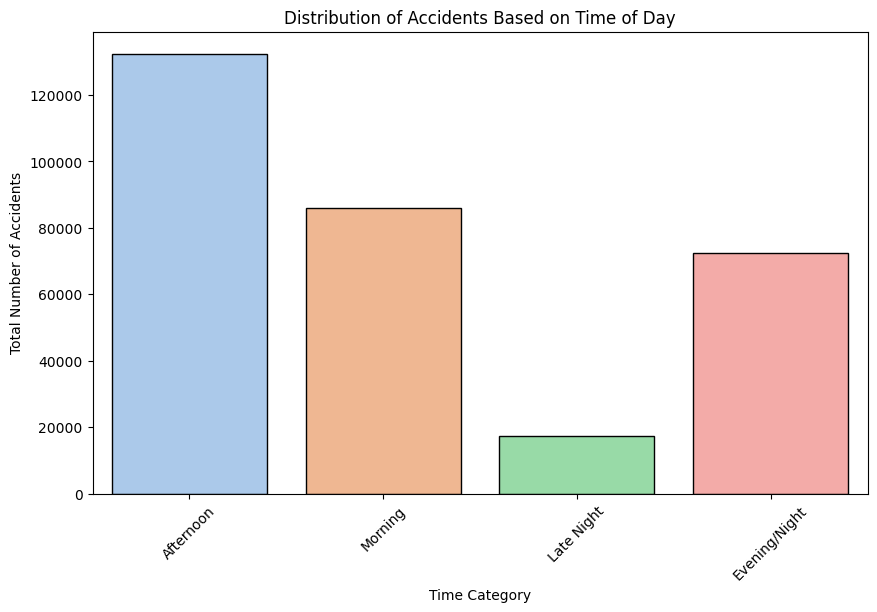

In [5]:
# Preprocess the 'Time' column to extract the hour of the day
accidents_df['Hour'] = pd.to_datetime(accidents_df['Time']).dt.hour

# Function to categorize time into time categories
def categorize_time(hour):
    if 0 <= hour < 6:
        return 'Late Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening/Night'

# Apply the categorize_time function to create the 'Time_Category' column
accidents_df['Time_Category'] = accidents_df['Hour'].apply(categorize_time)

# Set the figure size
plt.figure(figsize=(10, 6))

# Plotting the countplot for accidents based on time of day
sns.countplot(data=accidents_df, x='Time_Category', palette='pastel', edgecolor='black')

# Set title and labels
plt.title('Distribution of Accidents Based on Time of Day')
plt.xlabel('Time Category')
plt.ylabel('Total Number of Accidents')

# Show the plot
plt.xticks(rotation=45)
plt.show()

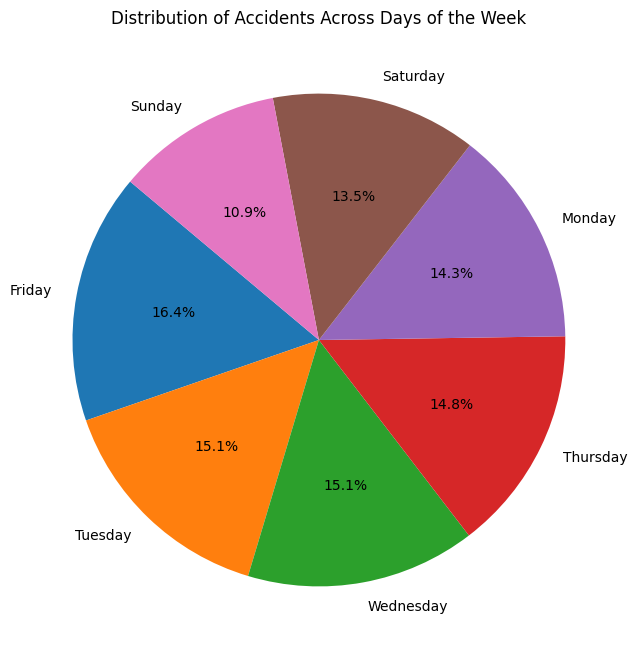

In [6]:
# Distribution of accidents across different days of the week
plt.figure(figsize=(8, 8))
day_counts = accidents_df['Day_of_Week'].value_counts()
plt.pie(day_counts, labels=day_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Accidents Across Days of the Week')
plt.show()

<ipython-input-7-a0701906456c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=accidents_df, x='Month', palette='pastel', edgecolor='black')


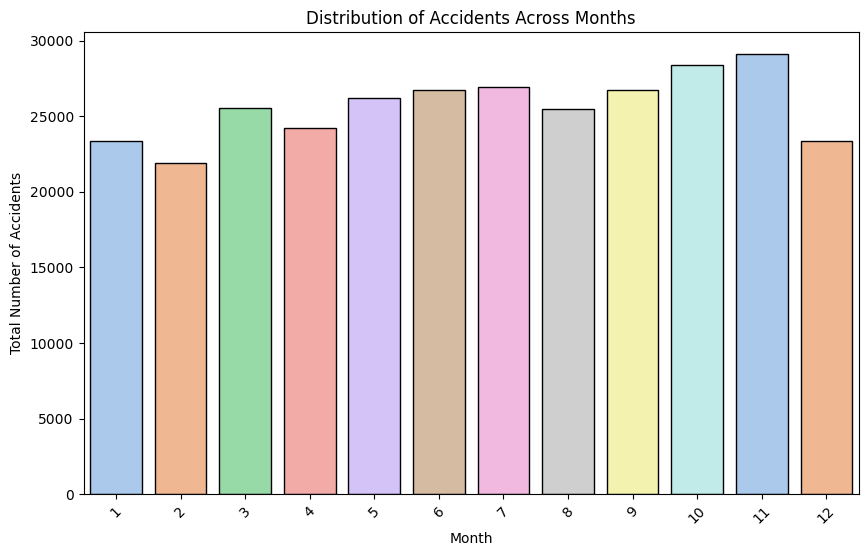

In [7]:
# Convert 'Accident Date' column to datetime format
accidents_df['Accident Date'] = pd.to_datetime(accidents_df['Accident Date'])

# Extract month from the 'Accident Date' column
accidents_df['Month'] = accidents_df['Accident Date'].dt.month

# Set the figure size
plt.figure(figsize=(10, 6))

# Plotting the countplot for accidents based on month
sns.countplot(data=accidents_df, x='Month', palette='pastel', edgecolor='black')

# Set title and labels
plt.title('Distribution of Accidents Across Months')
plt.xlabel('Month')
plt.ylabel('Total Number of Accidents')

# Show the plot
plt.xticks(rotation=45)
plt.show()

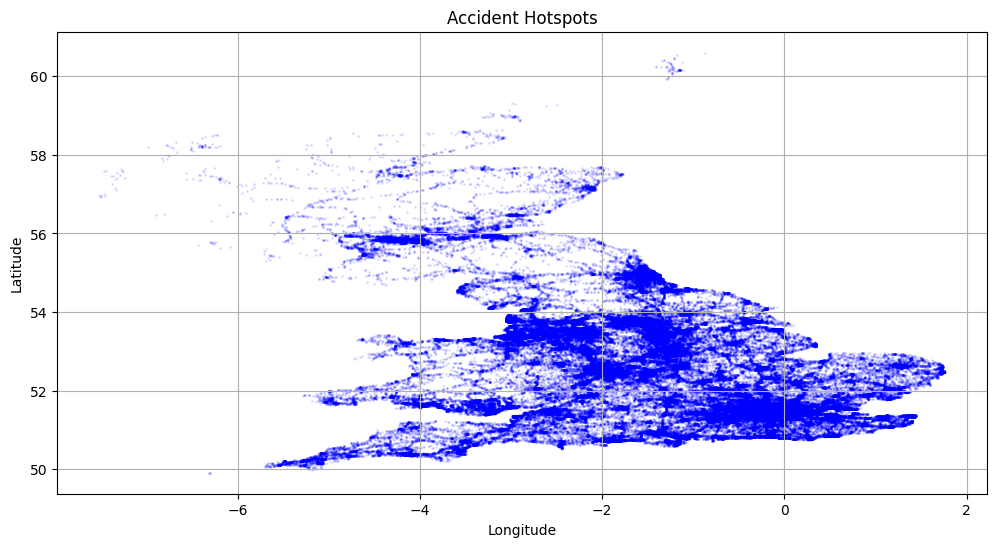

In [8]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the plots
plt.figure(figsize=(12, 6))

# Visualize accident hotspots based on latitude and longitude
plt.scatter(accidents_df['Longitude'], accidents_df['Latitude'], alpha=0.1, s=1, color='blue')
plt.title('Accident Hotspots')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

<ipython-input-9-d8ae2dddd375>:6: UserWarning: The palette list has more values (10) than needed (8), which may not be intended.
  ax = sns.countplot(data=accidents_df, x='Weather_Conditions', palette=pastel_palette, edgecolor='black',


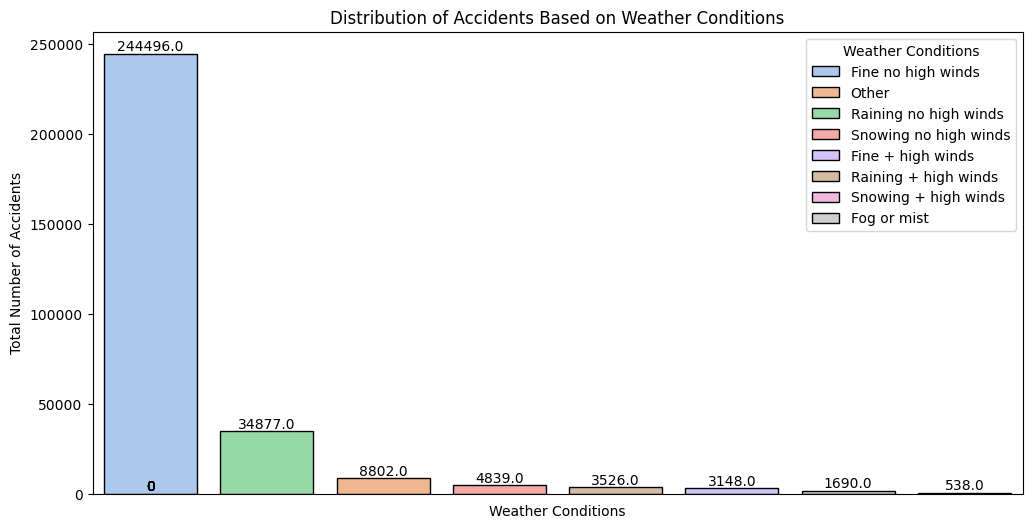

In [9]:
# Change color palette to pastel colors
pastel_palette = sns.color_palette("pastel")

# Distribution of accidents based on weather conditions
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=accidents_df, x='Weather_Conditions', palette=pastel_palette, edgecolor='black', 
                   order=accidents_df['Weather_Conditions'].value_counts().index, hue='Weather_Conditions')
plt.title('Distribution of Accidents Based on Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Total Number of Accidents')
plt.xticks([])  # Remove x-axis ticks

# Add total number of accidents for each weather condition on the x-axis
for i, p in enumerate(ax.patches):
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.legend(title='Weather Conditions')
plt.show()

<ipython-input-10-8800720f427b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=accidents_df, x='Light_Conditions', palette='pastel', edgecolor='black')


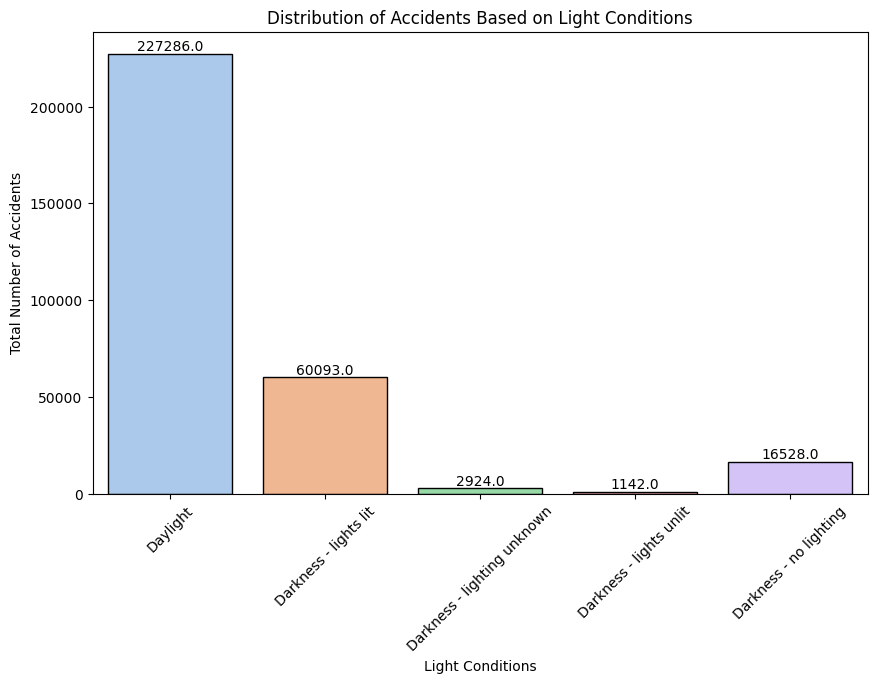

In [10]:
# Distribution of accidents based on light conditions
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=accidents_df, x='Light_Conditions', palette='pastel', edgecolor='black')
plt.title('Distribution of Accidents Based on Light Conditions')
plt.xlabel('Light Conditions')
plt.ylabel('Total Number of Accidents')
plt.xticks(rotation=45)

# Add total number of accidents for each light condition on the bars
for i, p in enumerate(ax.patches):
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()